In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Loading the data**

In [6]:
#Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [7]:
url = '/home/adi/Development/Projects/Fertilizer API/Fertilizer Recommendation.csv'

In [8]:
#Load the data
df=pd.read_csv(url)
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [5]:
#To display first five records
df.head(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [6]:
#To display last five records
df.tail(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [7]:
#To display fertilizer names
df['Fertilizer Name']

0         Urea
1          DAP
2     14-35-14
3        28-28
4         Urea
        ...   
94       28-28
95    10-26-26
96        Urea
97         DAP
98       20-20
Name: Fertilizer Name, Length: 99, dtype: object

# **Describing the data**

In [8]:
#describe() method returns description of the data in the DataFrame.
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [9]:
#To display number of rows and columns
df.shape

(99, 9)

In [10]:
#To display number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
#To return data type of each column. 
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [13]:
#To return the number of unique values for each column
df.nunique()

Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

In [14]:
#To count the number of not empty values for each row
df.count()

Temparature        99
Humidity           99
Moisture           99
Soil Type          99
Crop Type          99
Nitrogen           99
Potassium          99
Phosphorous        99
Fertilizer Name    99
dtype: int64

# **Data Wrangling**

In [15]:
#To display the number of empty values (NaN,NAN,na) in each column
df.isna()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
94,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False


In [16]:
#Count the number of empty values (NaN,NAN,na) in each column
df.isna().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [17]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

# **Exploratory Data Analysis**

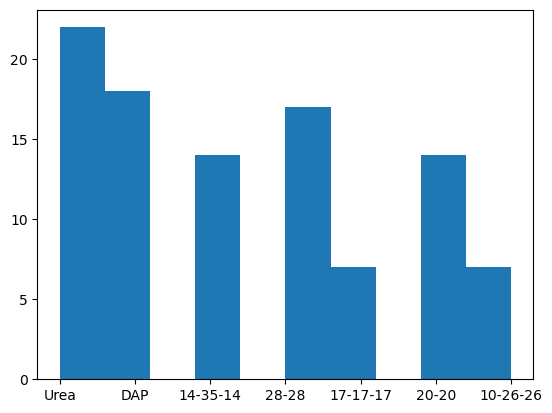

In [18]:
#Visualization of data using matplotlib.pyplot library
import matplotlib.pyplot as plt
plt.hist(df['Fertilizer Name'])
plt.show()

In [19]:
#Another method
df.groupby('Fertilizer Name').size()

Fertilizer Name
10-26-26     7
14-35-14    14
17-17-17     7
20-20       14
28-28       17
DAP         18
Urea        22
dtype: int64

In [20]:
#Getting all values of column Fertilizer Name
df['Fertilizer Name'].values

array(['Urea', 'DAP', '14-35-14', '28-28', 'Urea', '17-17-17', '20-20',
       'Urea', '28-28', '14-35-14', 'DAP', '17-17-17', 'Urea', '28-28',
       'DAP', '17-17-17', 'Urea', '28-28', 'Urea', 'DAP', '20-20',
       '17-17-17', 'DAP', 'Urea', '20-20', '28-28', '14-35-14', 'Urea',
       'DAP', '20-20', '28-28', 'DAP', 'Urea', '14-35-14', '28-28',
       'Urea', '14-35-14', 'DAP', '17-17-17', 'DAP', '20-20', '14-35-14',
       '28-28', 'Urea', 'DAP', '14-35-14', '20-20', '28-28', 'Urea',
       '14-35-14', '28-28', '20-20', 'Urea', 'DAP', '17-17-17', '28-28',
       'Urea', '20-20', '17-17-17', 'DAP', 'Urea', '20-20', '28-28',
       '10-26-26', 'Urea', 'DAP', '20-20', '14-35-14', '10-26-26',
       '20-20', '28-28', 'Urea', '28-28', 'Urea', 'DAP', '14-35-14',
       '28-28', '20-20', '10-26-26', 'DAP', '14-35-14', 'Urea', 'DAP',
       '20-20', '28-28', '14-35-14', '10-26-26', 'Urea', '10-26-26',
       'DAP', '14-35-14', '10-26-26', 'Urea', '14-35-14', '28-28',
       '10-26-26', 'U

In [21]:
data=['Urea', 'DAP', '14-35-14', '28-28', 'Urea', '17-17-17', '20-20',
       'Urea', '28-28', '14-35-14', 'DAP', '17-17-17', 'Urea', '28-28',
       'DAP', '17-17-17', 'Urea', '28-28', 'Urea', 'DAP', '20-20',
       '17-17-17', 'DAP', 'Urea', '20-20', '28-28', '14-35-14', 'Urea',
       'DAP', '20-20', '28-28', 'DAP', 'Urea', '14-35-14', '28-28',
       'Urea', '14-35-14', 'DAP', '17-17-17', 'DAP', '20-20', '14-35-14',
       '28-28', 'Urea', 'DAP', '14-35-14', '20-20', '28-28', 'Urea',
       '14-35-14', '28-28', '20-20', 'Urea', 'DAP', '17-17-17', '28-28',
       'Urea', '20-20', '17-17-17', 'DAP', 'Urea', '20-20', '28-28',
       '10-26-26', 'Urea', 'DAP', '20-20', '14-35-14', '10-26-26',
       '20-20', '28-28', 'Urea', '28-28', 'Urea', 'DAP', '14-35-14',
       '28-28', '20-20', '10-26-26', 'DAP', '14-35-14', 'Urea', 'DAP',
       '20-20', '28-28', '14-35-14', '10-26-26', 'Urea', '10-26-26',
       'DAP', '14-35-14', '10-26-26', 'Urea', '14-35-14', '28-28',
       '10-26-26', 'Urea', 'DAP', '20-20']
List=[]
UreaCount=0;
DAPCount=0;
F143514Count=0;
F2828Count=0;
F171717Count=0;
F2020Count=0;
F102626Count=0;
for x in data:
    if x=='Urea':
       UreaCount = UreaCount + 1;
    elif x=='DAP':
       DAPCount = DAPCount + 1;
    elif x=='14-35-14':
       F143514Count = F143514Count + 1;
    elif x=='28-28':
       F2828Count = F2828Count + 1;
    elif x=='17-17-17':
       F171717Count = F171717Count + 1;
    elif x=='20-20':
       F2020Count = F2020Count + 1;
    elif x=='10-26-26':
       F102626Count = F102626Count + 1;
List.append(UreaCount)
List.append(DAPCount)
List.append(F143514Count)
List.append(F2828Count)
List.append(F171717Count)
List.append(F2020Count)
List.append(F102626Count)
print(List)

[22, 18, 14, 17, 7, 14, 7]


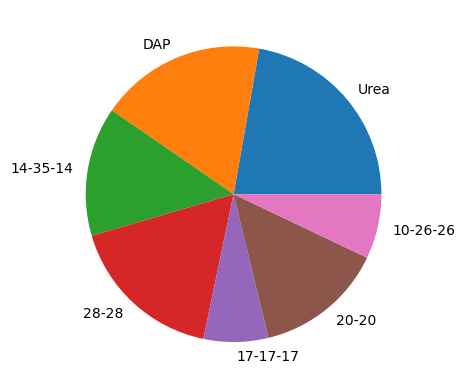

In [22]:
#Visualizing it using piechart
import matplotlib.pyplot as plt
plt.pie(List,labels=["Urea","DAP","14-35-14","28-28","17-17-17","20-20","10-26-26"])
plt.show()

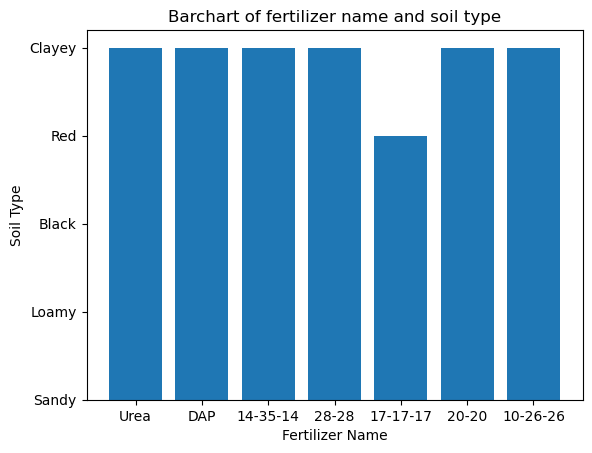

In [23]:
import matplotlib.pyplot as plt
x=df['Fertilizer Name']
y=df['Soil Type']
plt.bar(x,y)
plt.title("Barchart of fertilizer name and soil type")
plt.xlabel("Fertilizer Name")
plt.ylabel("Soil Type")
plt.show()

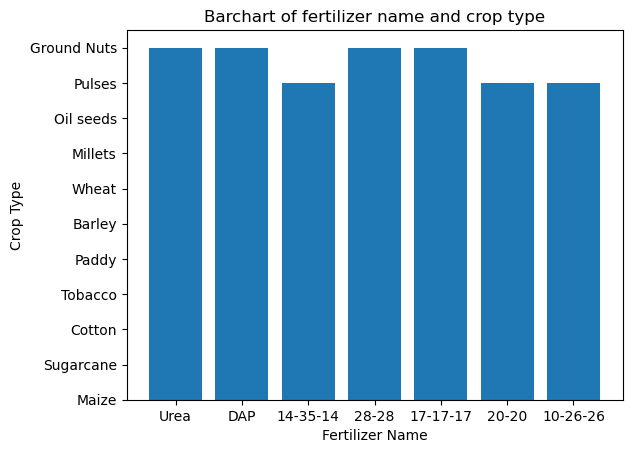

In [24]:
import matplotlib.pyplot as plt
x=df['Fertilizer Name']
y=df['Crop Type']
plt.bar(x,y)
plt.title("Barchart of fertilizer name and crop type")
plt.xlabel("Fertilizer Name")
plt.ylabel("Crop Type")
plt.show()

<Axes: xlabel='Fertilizer Name', ylabel='count'>

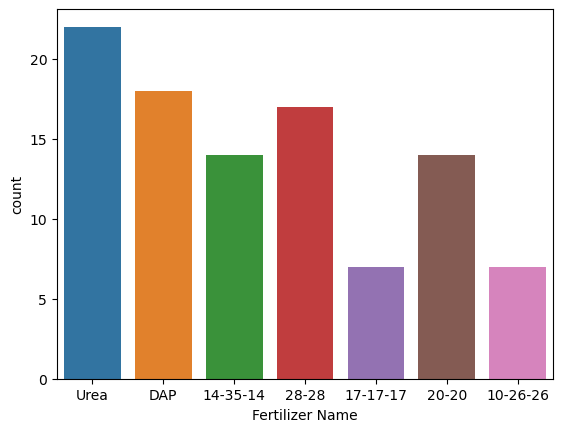

In [25]:
#Visualization of data using seaborn library
import seaborn as sns
#Visualizing fertilizer name using countplot
#A count plot is helpful when dealing with categorical values. It is used to plot the frequency of the different categories.
sns.countplot(x='Fertilizer Name',data=df)

<Axes: >

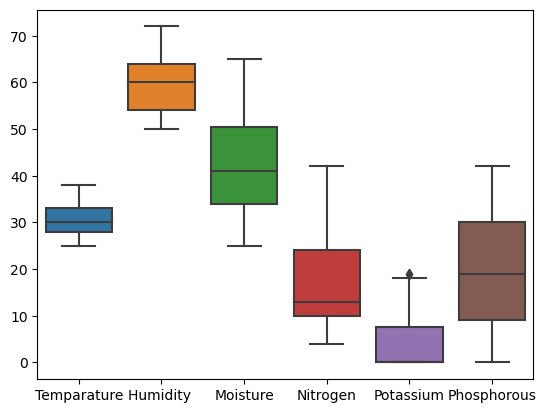

In [26]:
#Visualizing data using boxplot
sns.boxplot(data=df)
#Here we got boxplot of all the columns 

<Axes: xlabel='Soil Type', ylabel='Temparature'>

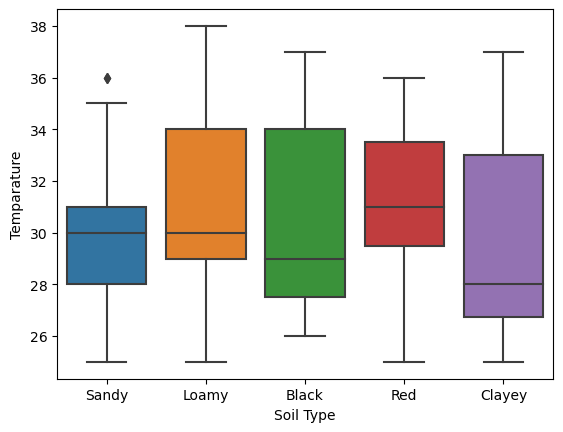

In [27]:
#relation of soil type with temperature 
sns.boxplot(x=df['Soil Type'],y=df['Temparature'])

<Axes: xlabel='Soil Type', ylabel='Humidity '>

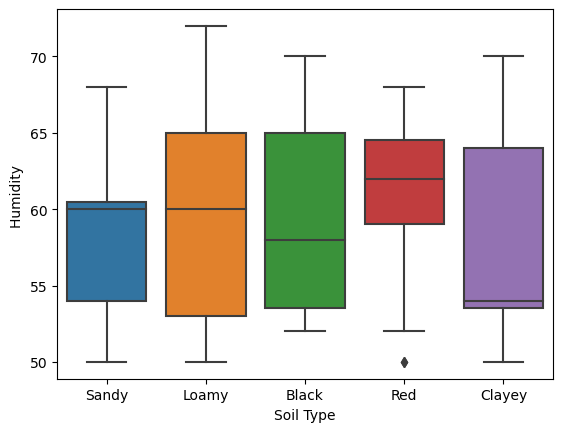

In [28]:
#relation of soil type with humidity
sns.boxplot(x=df['Soil Type'],y=df['Humidity '])

<Axes: xlabel='Soil Type', ylabel='Temparature'>

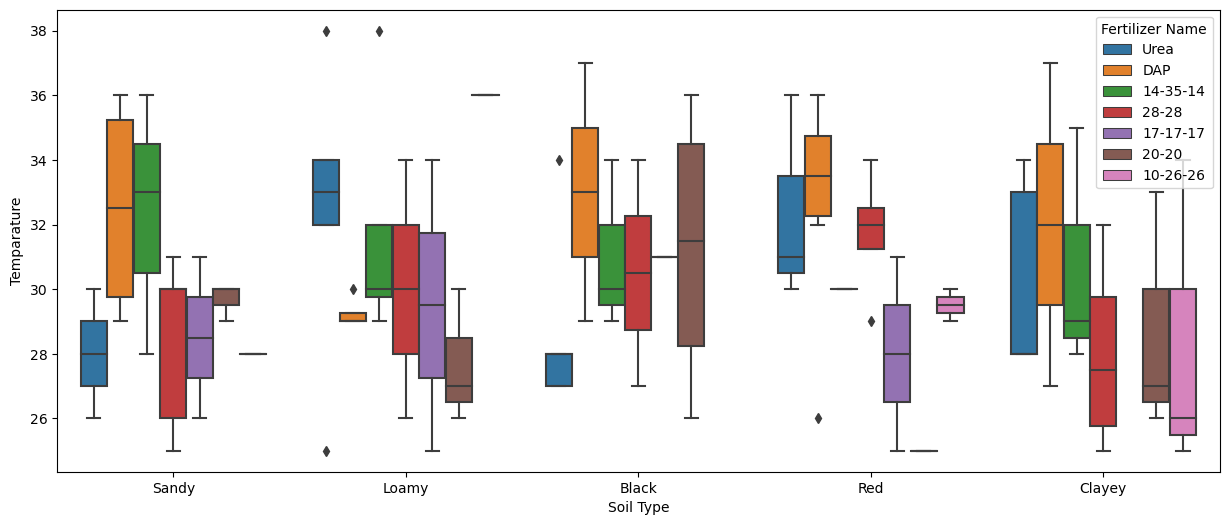

In [29]:
#relation of soil type and temperature with output variable
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'],hue=df['Fertilizer Name'])

<Axes: xlabel='Soil Type', ylabel='Humidity '>

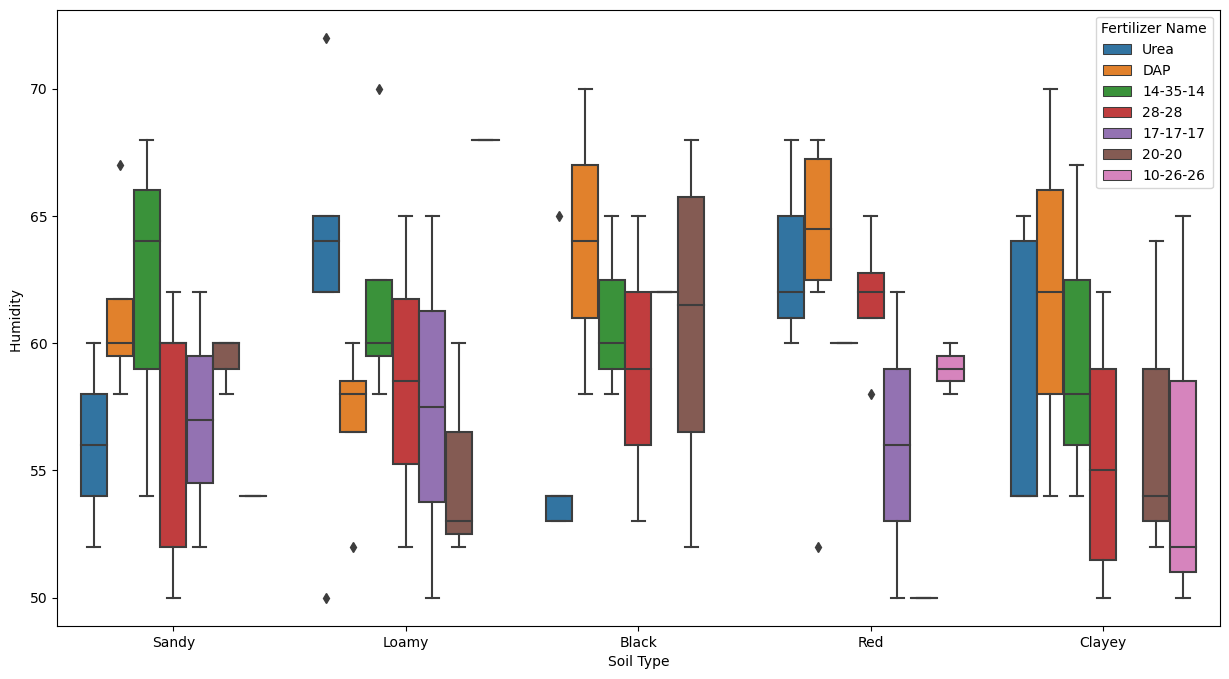

In [30]:
#relation of soil type with humidity with output variable
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Soil Type'],y=df['Humidity '],hue=df['Fertilizer Name'])

<Axes: xlabel='Crop Type', ylabel='Temparature'>

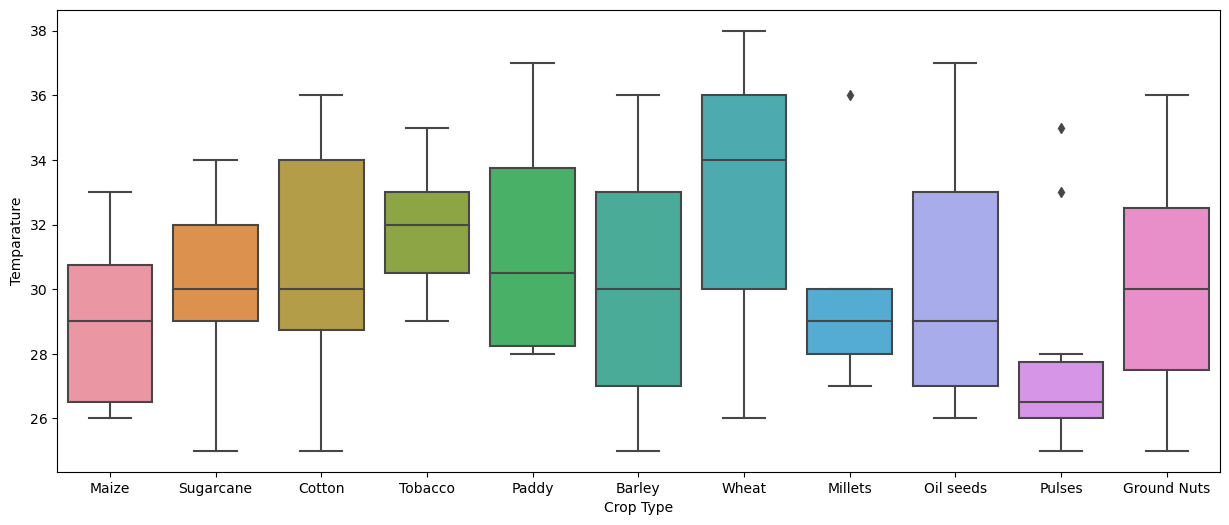

In [31]:
#relation of crop type with temperature 
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Crop Type'],y=df['Temparature'])

<Axes: xlabel='Crop Type', ylabel='Humidity '>

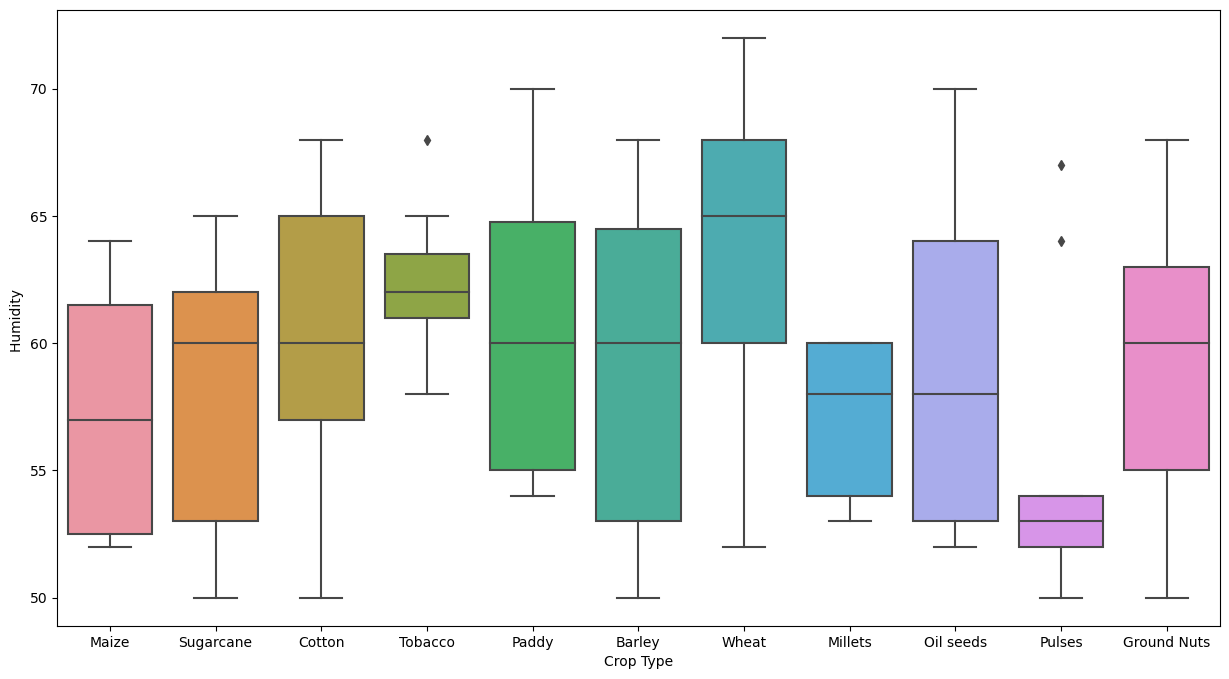

In [32]:
#relation of crop type with humidity
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Humidity '])

<Axes: xlabel='Crop Type', ylabel='Temparature'>

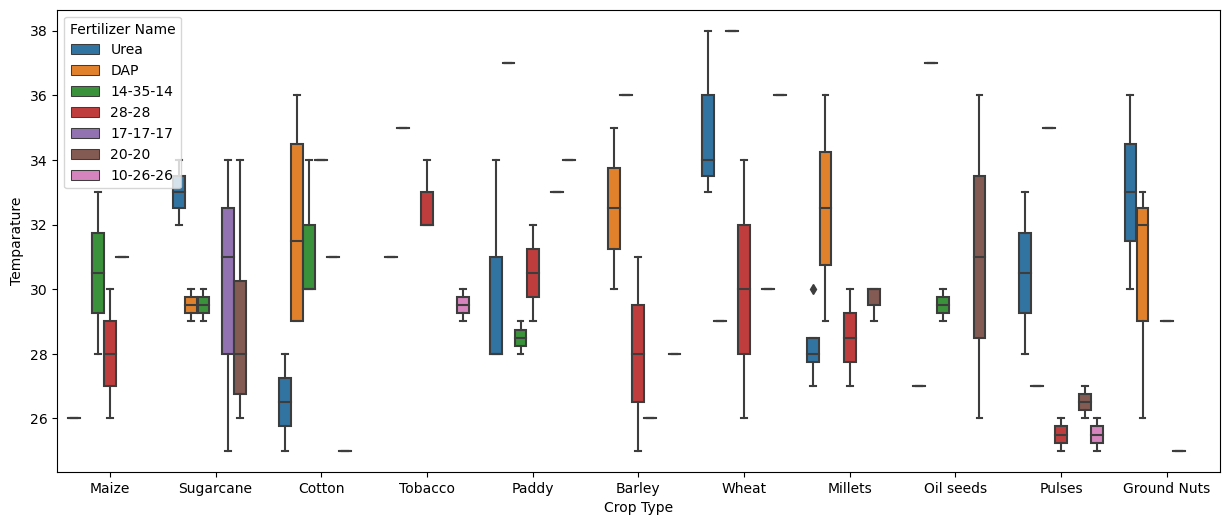

In [33]:
#relation of crop type and temperature with output variable
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Crop Type'],y=df['Temparature'],hue=df['Fertilizer Name'])

<Axes: xlabel='Crop Type', ylabel='Humidity '>

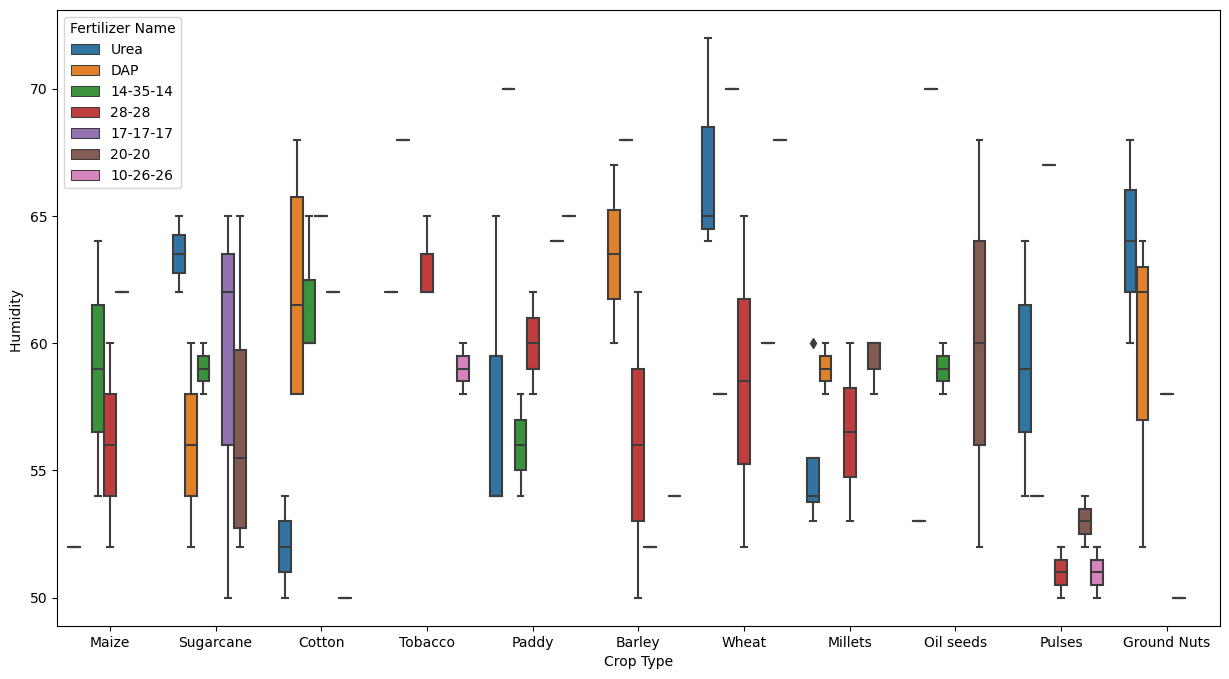

In [34]:
#relation of crop type with humidity with output variable
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Humidity '],hue=df['Fertilizer Name'])

**Encoding categorical data values**

In [14]:
#To display the values of column fertilizer name
df.iloc[:,8].values

array(['Urea', 'DAP', '14-35-14', '28-28', 'Urea', '17-17-17', '20-20',
       'Urea', '28-28', '14-35-14', 'DAP', '17-17-17', 'Urea', '28-28',
       'DAP', '17-17-17', 'Urea', '28-28', 'Urea', 'DAP', '20-20',
       '17-17-17', 'DAP', 'Urea', '20-20', '28-28', '14-35-14', 'Urea',
       'DAP', '20-20', '28-28', 'DAP', 'Urea', '14-35-14', '28-28',
       'Urea', '14-35-14', 'DAP', '17-17-17', 'DAP', '20-20', '14-35-14',
       '28-28', 'Urea', 'DAP', '14-35-14', '20-20', '28-28', 'Urea',
       '14-35-14', '28-28', '20-20', 'Urea', 'DAP', '17-17-17', '28-28',
       'Urea', '20-20', '17-17-17', 'DAP', 'Urea', '20-20', '28-28',
       '10-26-26', 'Urea', 'DAP', '20-20', '14-35-14', '10-26-26',
       '20-20', '28-28', 'Urea', '28-28', 'Urea', 'DAP', '14-35-14',
       '28-28', '20-20', '10-26-26', 'DAP', '14-35-14', 'Urea', 'DAP',
       '20-20', '28-28', '14-35-14', '10-26-26', 'Urea', '10-26-26',
       'DAP', '14-35-14', '10-26-26', 'Urea', '14-35-14', '28-28',
       '10-26-26', 'U

In [16]:
#Encoding Fertilizer Name using get_dummies
one_hot_encoded_data = pd.get_dummies(data=df, columns = ['Fertilizer Name'])
print(one_hot_encoded_data)

    Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  \
0            26         52        38     Sandy      Maize        37   
1            29         52        45     Loamy  Sugarcane        12   
2            34         65        62     Black     Cotton         7   
3            32         62        34       Red    Tobacco        22   
4            28         54        46    Clayey      Paddy        35   
..          ...        ...       ...       ...        ...       ...   
94           25         50        32    Clayey     Pulses        24   
95           30         60        27       Red    Tobacco         4   
96           38         72        51     Loamy      Wheat        39   
97           36         60        43     Sandy    Millets        15   
98           29         58        57     Black  Sugarcane        12   

    Potassium  Phosphorous  Fertilizer Name_10-26-26  \
0           0            0                     False   
1           0           36         

In [17]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()
df['Fertilizer Name']=onehot_encoder.fit_transform(df[['Fertilizer Name']]).toarray()
df['Fertilizer Name'].values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.])

In [18]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()
df['Soil Type']=onehot_encoder.fit_transform(df[['Soil Type']]).toarray()
df['Soil Type'].values

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.])

In [19]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()
df['Crop Type']=onehot_encoder.fit_transform(df[['Crop Type']]).toarray()
df['Crop Type'].values

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
#Now checking data type of column fertilizer name
df['Fertilizer Name'].dtype

dtype('float64')

In [21]:
#To display first 5 rows of new data
df.head(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,0.0,0.0,37,0,0,0.0
1,29,52,45,0.0,0.0,12,0,36,0.0
2,34,65,62,1.0,0.0,7,9,30,0.0
3,32,62,34,0.0,0.0,22,0,20,0.0
4,28,54,46,0.0,0.0,35,0,0,0.0


In [22]:
#Finding the correlation 
#corr() function tells us how one column can influence the other
data1=df.iloc[:,0:9].corr()
data1

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
Temparature,1.000000,0.973164,0.091222,-0.002751,-0.011080,-0.033771,-0.023424,0.207545,-0.045006
Humidity,0.973164,1.000000,0.091342,-0.017121,-0.007192,-0.060646,-0.003833,0.204044,-0.047881
Moisture,0.091222,0.091342,1.000000,0.065288,-0.036096,-0.095945,0.027727,0.009276,-0.095831
Soil Type,-0.002751,-0.017121,0.065288,1.000000,-0.134427,0.130520,-0.116573,-0.165494,-0.134427
Crop Type,-0.011080,-0.007192,-0.036096,-0.134427,1.000000,-0.151475,0.090681,0.152105,0.077640
Nitrogen,-0.033771,-0.060646,-0.095945,0.130520,-0.151475,1.000000,-0.500087,-0.686971,-0.270980
Potassium,-0.023424,-0.003833,0.027727,-0.116573,0.090681,-0.500087,1.000000,0.089192,0.683274
Phosphorous,0.207545,0.204044,0.009276,-0.165494,0.152105,-0.686971,0.089192,1.000000,-0.018345
Fertilizer Name,-0.045006,-0.047881,-0.095831,-0.134427,0.077640,-0.270980,0.683274,-0.018345,1.000000


<Axes: >

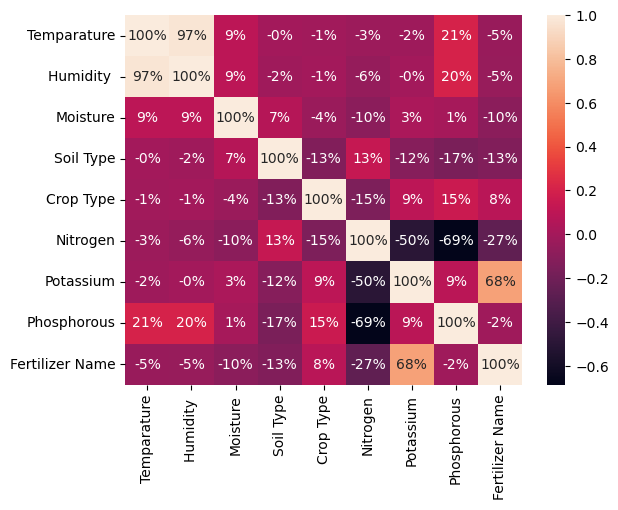

In [23]:
#Visualize the correlation of above data using heatmap
sns.heatmap(data1,annot=True,fmt='.0%')

# **Machine Learning**

**Model 1:- Decision Tree Classifier**

In [24]:
#Dividing data into X and Y(converting into numpy)
X=df.iloc[:,0:8].values  #Independent dataset 
Y=df.iloc[:,8].values     #Dependent dataset 

In [25]:
print(X)

[[26. 52. 38.  0.  0. 37.  0.  0.]
 [29. 52. 45.  0.  0. 12.  0. 36.]
 [34. 65. 62.  1.  0.  7.  9. 30.]
 [32. 62. 34.  0.  0. 22.  0. 20.]
 [28. 54. 46.  0.  0. 35.  0.  0.]
 [26. 52. 35.  0.  1. 12. 10. 13.]
 [25. 50. 64.  0.  0.  9.  0. 10.]
 [33. 64. 50.  0.  0. 41.  0.  0.]
 [30. 60. 42.  0.  0. 21.  0. 18.]
 [29. 58. 33.  1.  0.  9.  7. 30.]
 [27. 54. 28.  0.  0. 13.  0. 40.]
 [31. 62. 48.  0.  0. 14. 15. 12.]
 [25. 50. 65.  0.  0. 36.  0.  0.]
 [32. 62. 41.  0.  0. 24.  0. 22.]
 [26. 52. 31.  0.  0. 14.  0. 41.]
 [31. 62. 49.  1.  0. 10. 13. 14.]
 [33. 64. 34.  0.  0. 38.  0.  0.]
 [25. 50. 39.  0.  1. 21.  0. 19.]
 [28. 54. 65.  1.  0. 39.  0.  0.]
 [29. 58. 52.  0.  0. 13.  0. 36.]
 [30. 60. 44.  0.  0. 10.  0.  9.]
 [34. 65. 53.  0.  0. 12. 14. 12.]
 [35. 68. 33.  0.  0. 11.  0. 37.]
 [28. 54. 37.  1.  0. 36.  0.  0.]
 [33. 64. 39.  0.  0. 13.  0. 10.]
 [26. 52. 44.  0.  0. 23.  0. 20.]
 [30. 60. 63.  0.  0.  9.  9. 29.]
 [32. 62. 30.  0.  0. 38.  0.  0.]
 [37. 70. 32.  1.  0

In [26]:
print(Y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0.]


In [27]:
#Splitting dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
#Fitting the Decision Tree Classifier model on X and Y
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(criterion='entropy',random_state=0)
model1.fit(X_train,Y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
# prediction of this model 
pred1=model1.predict(X_test)

In [31]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,pred1))

0.95


In [32]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred1))

[[17  0]
 [ 1  2]]


In [33]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        17
         1.0       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.89        20
weighted avg       0.95      0.95      0.95        20



**Model 2:- Logistic Regression**

In [34]:
#Fitting the Logistic Regression model on X and Y
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(X_train,Y_train)

LogisticRegression()

In [35]:
#prediction of this model
pred2=model2.predict(X_test)

In [36]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,pred2))

0.9


In [37]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred2))

[[17  0]
 [ 2  1]]


In [38]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        17
         1.0       1.00      0.33      0.50         3

    accuracy                           0.90        20
   macro avg       0.95      0.67      0.72        20
weighted avg       0.91      0.90      0.88        20



**Model 3:- Random Forest Classifier**

In [39]:
#Fitting the Random Forest Classifier model on X and Y
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(X_train,Y_train)

RandomForestClassifier()

In [40]:
#prediction of this model
pred3=model3.predict(X_test)

In [41]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred3)

0.9

In [42]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred3))

[[17  0]
 [ 2  1]]


In [43]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred3))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        17
         1.0       1.00      0.33      0.50         3

    accuracy                           0.90        20
   macro avg       0.95      0.67      0.72        20
weighted avg       0.91      0.90      0.88        20



In [44]:
import pickle

# Save models
pickle.dump(model1, open("decision_tree_model.pkl", "wb"))
pickle.dump(model2, open("logistic_regression_model.pkl", "wb"))
pickle.dump(model3, open("random_forest_model.pkl", "wb"))

# Save the scaler
pickle.dump(sc, open("scaler.pkl", "wb"))
